### NFL DATA PREVIEW - FiveThirtyEight
####

 #### First Data Analysis

##### Load all the libraries needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


##### Data Frame Understanding

In [3]:
df = pd.read_csv('nfl_elo.csv')

In [4]:
df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947000,1300.000000,0.824651,0.175349,1516.108000,1287.838000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688000,1300.000000,0.825267,0.174733,1516.803000,1287.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,CHI,MUT,1368.333000,1300.000000,0.682986,0.317014,1386.533000,1281.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,RII,MUN,1516.108000,1478.004000,0.644171,0.355829,1542.135000,1451.977000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,DAY,COL,1493.002000,1504.908000,0.575819,0.424181,1515.434000,1482.475000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17090,2022-01-23,2021,0,d,TB,LAR,1681.797158,1632.341105,0.659005,0.340995,1662.522916,1651.615346,1649.547292,1615.165080,Tom Brady,Matthew Stafford,249.882409,179.870436,11.456236,-0.623739,0.681440,0.318560,132.180809,379.027146,238.112249,199.786107,1629.446888,1635.265484,27,30,96.0,100.0,98.0
17091,2022-01-23,2021,0,d,KC,BUF,1699.470145,1683.332367,0.614689,0.385311,1713.932369,1668.870143,1687.450699,1656.910634,Patrick Mahomes,Josh Allen,273.771767,275.630099,20.577067,18.202487,0.652720,0.347280,622.042187,434.101420,308.598809,291.477231,1700.324756,1644.036577,42,36,100.0,100.0,100.0
17092,2022-01-30,2021,0,c,KC,CIN,1713.932369,1569.498961,0.769519,0.230481,1690.352000,1593.079331,1700.324756,1559.717895,Patrick Mahomes,Joe Burrow,308.598809,190.637925,36.961734,24.405309,0.810417,0.189583,134.683170,153.972640,291.207245,186.971396,1674.943733,1585.098917,24,27,98.0,100.0,99.0
17093,2022-01-30,2021,0,c,LAR,SF,1651.615346,1621.465562,0.633608,0.366392,1661.352751,1611.728157,1635.265484,1631.632019,Matthew Stafford,Jimmy Garoppolo,199.786107,117.398901,9.365284,-11.464001,0.636093,0.363907,248.504596,197.148060,204.657956,125.373817,1644.929010,1621.968494,20,17,96.0,100.0,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17095 entries, 0 to 17094
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17095 non-null  object 
 1   season          17095 non-null  int64  
 2   neutral         17095 non-null  int64  
 3   playoff         603 non-null    object 
 4   team1           17095 non-null  object 
 5   team2           17095 non-null  object 
 6   elo1_pre        17095 non-null  float64
 7   elo2_pre        17095 non-null  float64
 8   elo_prob1       17095 non-null  float64
 9   elo_prob2       17095 non-null  float64
 10  elo1_post       17095 non-null  float64
 11  elo2_post       17095 non-null  float64
 12  qbelo1_pre      14933 non-null  float64
 13  qbelo2_pre      14933 non-null  float64
 14  qb1             14933 non-null  object 
 15  qb2             14933 non-null  object 
 16  qb1_value_pre   14933 non-null  float64
 17  qb2_value_pre   14933 non-null 

In [6]:
df.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
count,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,17095.000000,17095.000000,14933.000000,285.000000,285.000000
mean,1984.242586,0.005616,1502.984435,1499.332970,0.584957,0.415043,1502.700432,1499.616974,1504.252150,1502.850085,96.056700,95.947423,-1.383751,-1.477592,0.575240,0.424760,108.927303,88.279857,97.343760,95.180666,1504.236458,1502.865777,21.657502,18.798421,47.962633,51.273684,49.392982
std,26.098240,0.074729,105.012423,104.379492,0.175204,0.175204,107.552433,106.574161,100.083829,98.787079,58.203887,57.670049,25.169728,25.885790,0.178205,0.178205,133.545387,131.999024,58.484917,57.864538,102.517543,101.034230,11.245606,10.810285,29.361843,32.517744,28.342099
min,1920.000000,0.000000,1119.595000,1156.551000,0.070953,0.029484,1119.595000,1153.902000,1149.699743,1152.474651,-53.778917,-47.286867,-242.487678,-235.050690,0.059810,0.032803,-385.737110,-413.971659,-46.329533,-53.778917,1164.327676,1149.699743,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1968.000000,0.000000,1429.936414,1426.266000,0.461318,0.280523,1427.348694,1424.614909,1434.407076,1434.420125,53.675218,54.305844,-8.354821,-8.260677,0.446938,0.286271,15.357794,-5.233909,54.602147,53.055412,1432.603011,1432.285516,14.000000,10.000000,22.000000,19.000000,23.000000
50%,1989.000000,0.000000,1504.908000,1500.922000,0.596736,0.403264,1504.723000,1501.007000,1505.896921,1504.596790,90.547152,90.695040,1.927152,2.082483,0.586733,0.413267,105.906211,84.060670,91.569566,89.754330,1505.385999,1505.337741,21.000000,17.000000,48.000000,55.000000,51.000000
75%,2006.000000,0.000000,1578.516500,1576.278939,0.719477,0.538682,1581.042500,1577.232000,1574.715081,1574.859402,132.125978,131.472482,12.014732,11.952816,0.713729,0.553062,199.411390,176.853096,133.368387,131.420246,1578.525611,1575.207217,28.000000,26.000000,73.000000,79.000000,72.000000
max,2021.000000,1.000000,1839.663000,1849.484000,0.970516,0.929047,1849.484000,1831.462000,1806.390160,1814.366226,329.562716,327.716545,107.685793,107.087461,0.967197,0.940190,713.695222,605.098179,327.716545,329.562716,1814.366226,1806.223590,72.000000,73.000000,100.000000,100.000000,100.000000


In [7]:
df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating'], dtype='object')

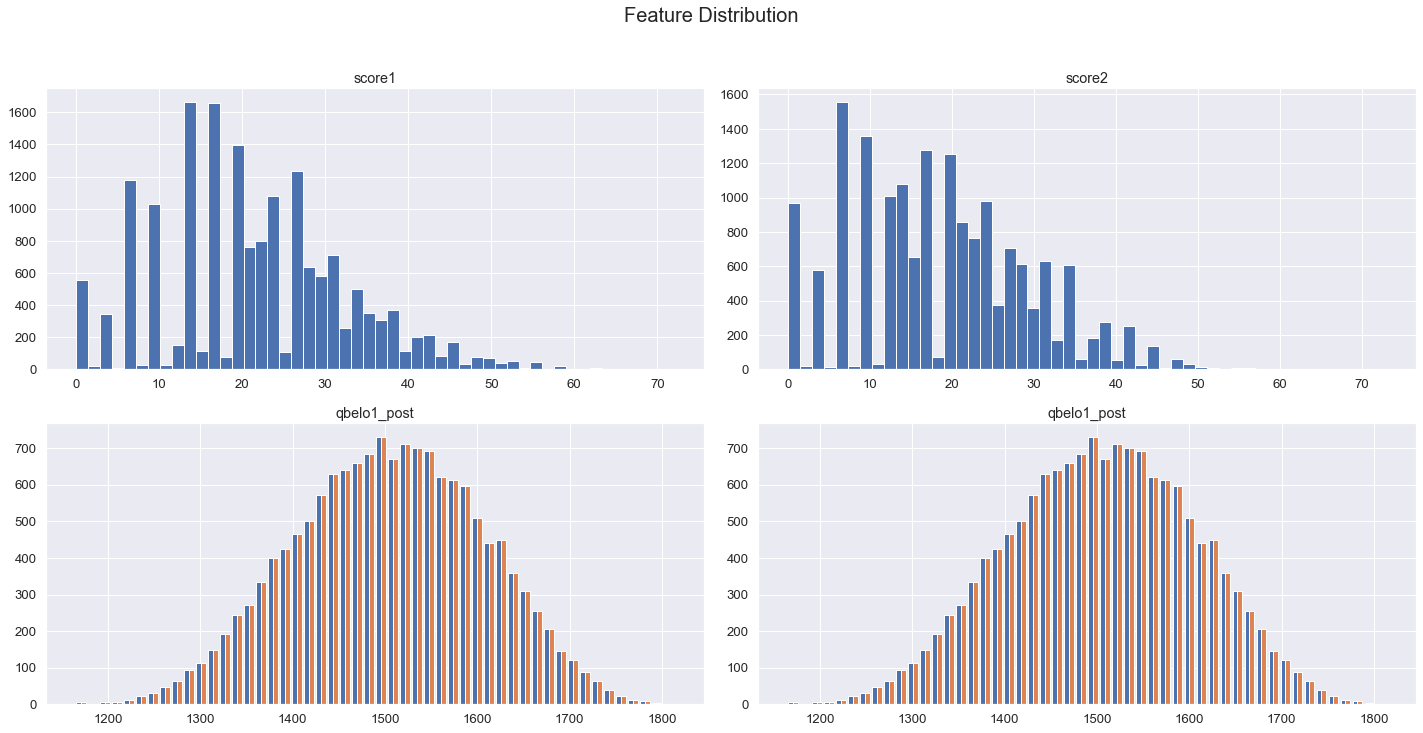

In [8]:
df[['score1', 'score2', 'qbelo1_post', 'qbelo1_post']].hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

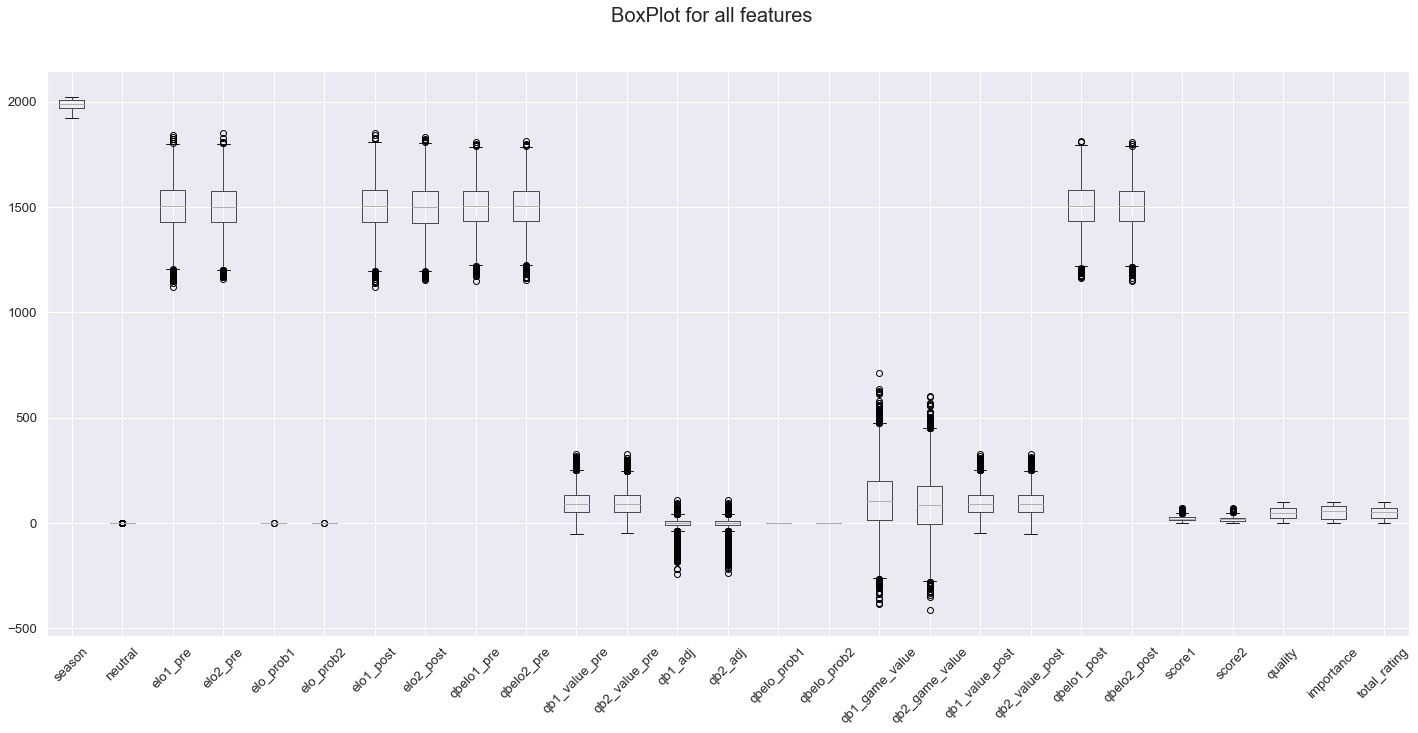

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot for all features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
top10scor1 = df.nlargest(10,'score1')
top10scor1

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
3952,1966-11-27,1966,0,NaN,WSH,NYG,1467.895,1290.354,0.801577,0.198423,1480.283,1277.967,1459.891608,1298.880851,Sonny Jurgensen,Tom Kennedy,130.508607,0.000000,10.445106,-71.008867,0.847730,0.152270,184.090936,11.448109,135.866840,1.144811,1469.186096,1289.586363,72,41,1.0,NaN,NaN
2197,1950-10-22,1950,0,NaN,LAR,BCL,1581.945,1285.841,0.888814,0.111186,1589.174,1278.613,1583.605567,1284.475176,Norm Van Brocklin,Adrian Burk,11.484769,3.612114,4.202010,7.611702,0.888596,0.111404,130.191154,65.647941,23.355407,9.815697,1590.849355,1277.231388,70,27,15.0,NaN,NaN
9,1920-10-10,1920,0,NaN,RCH,FTP,1510.934,1300.000,0.830391,0.169609,1523.607,1287.327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,0,NaN,NaN,NaN
2203,1950-10-29,1950,0,NaN,LAR,DET,1589.174,1462.687,0.750689,0.249311,1606.318,1445.542,1590.849355,1463.375342,Norm Van Brocklin,Bobby Layne,23.355407,27.071473,9.927229,11.256738,0.741393,0.258607,439.954968,-16.783853,65.015364,22.685941,1608.696828,1445.527870,65,24,66.0,NaN,NaN
1092,1934-11-06,1934,0,NaN,PHI,RED,1353.847,1259.801,0.714133,0.285867,1376.104,1237.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,0,NaN,NaN,NaN
2372,1952-11-30,1952,0,NaN,PIT,NYG,1444.335,1629.970,0.333048,0.666952,1501.394,1572.911,1448.119914,1619.801058,Jim Finks,Charlie Conerly,53.995202,23.829453,6.694302,-1.717670,0.350681,0.649319,250.768504,-11.374592,73.672532,20.309048,1503.309169,1564.611803,63,7,65.0,NaN,NaN
187,1922-10-29,1922,0,NaN,AKR,OOR,1552.859,1313.459,0.852239,0.147761,1563.615,1302.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,0,NaN,NaN,NaN
1802,1946-12-01,1946,0,NaN,LDA,BBA,1325.661,1215.215,0.733010,0.266990,1344.908,1195.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,14,NaN,NaN,NaN
2453,1953-12-06,1953,0,NaN,CLE,NYG,1713.504,1470.675,0.854707,0.145293,1723.425,1460.754,1698.325533,1476.221217,George Ratterman,Charlie Conerly,29.256201,43.910444,-112.017035,6.869948,0.715037,0.284963,259.532206,-17.931803,52.283801,37.726219,1719.003859,1455.542891,62,14,66.0,NaN,NaN
2499,1954-11-07,1954,0,NaN,CLE,WSH,1598.130,1392.260,0.826246,0.173754,1610.799,1379.591,1590.516454,1391.200785,Otto Graham,Al Dorow,136.067168,-6.352016,11.229476,0.248339,0.822643,0.177357,78.054674,-201.596676,130.265919,-25.876482,1603.470193,1378.247046,62,3,43.0,NaN,NaN


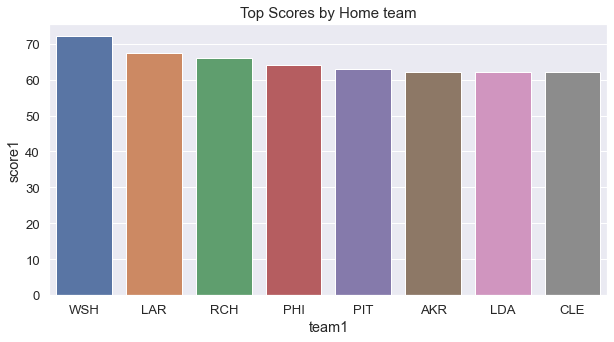

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=top10scor1.team1, y=top10scor1.score1, data=top10scor1, ci=None)
plt.title("Top Scores by Home team", fontsize=15)
plt.show()

In [17]:
top10scor2 = df.nlargest(10,'score2')
top10scor2



,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
1447,1940-12-08,1940,0,c,WSH,CHI,1638.573,1663.280,0.557728,0.442272,1589.668,1712.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,73,NaN,NaN,NaN
1811,1946-12-08,1946,0,NaN,BDA,CLE,1210.488,1464.783,0.251680,0.748320,1192.086,1483.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,66,NaN,NaN,NaN
2127,1949-11-13,1949,0,NaN,NYY,ARI,1275.147,1554.292,0.225706,0.774294,1259.397,1570.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,65,NaN,NaN,NaN
1983,1948-10-17,1948,0,NaN,NYG,ARI,1416.284,1599.879,0.335662,0.664338,1394.835,1621.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,63,NaN,NaN,NaN
2028,1948-11-21,1948,0,NaN,BDA,SF,1249.043,1616.771,0.148978,0.851022,1240.719,1625.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,63,NaN,NaN,NaN
5119,1973-09-16,1973,0,NaN,NO,ATL,1383.864,1488.348,0.443421,0.556579,1348.795,1523.417,1378.464474,1480.834790,Archie Manning,Dick Shiner,100.984809,69.702043,4.974799,-4.833945,0.448573,0.551427,-173.268266,279.632016,73.559502,90.695040,1342.930394,1516.368871,7,62,16.0,NaN,NaN
2091,1949-10-14,1949,0,NaN,LDA,CLE,1427.413,1644.089,0.294606,0.705394,1406.075,1665.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,61,NaN,NaN,NaN
5099,1972-12-17,1972,0,NaN,TEN,CIN,1283.793,1491.290,0.305705,0.694295,1261.935,1513.149,1290.117064,1489.186703,Kent Nix,Ken Anderson,14.506371,72.739424,-18.143425,5.824508,0.276510,0.723490,132.125208,297.493174,26.268255,95.214799,1270.551437,1508.752330,17,61,3.0,NaN,NaN
3351,1963-09-07,1963,0,NaN,DEN,KC,1411.746,1551.171,0.394503,0.605497,1381.446,1581.472,1401.987122,1537.998108,Frank Tripucka,Len Dawson,63.149942,119.967262,1.466721,7.189672,0.380772,0.619228,-92.190855,367.595271,47.615862,144.730063,1372.869647,1567.115583,7,59,33.0,NaN,NaN
13973,2010-10-24,2010,0,NaN,DEN,OAK,1457.844,1377.928,0.697243,0.302757,1400.690,1435.083,1450.655695,1391.516873,Kyle Orton,Jason Campbell,166.311622,74.459486,20.306689,-0.108041,0.689138,0.310862,20.595005,181.890678,151.739960,85.202606,1394.346739,1447.825828,14,59,16.0,NaN,NaN


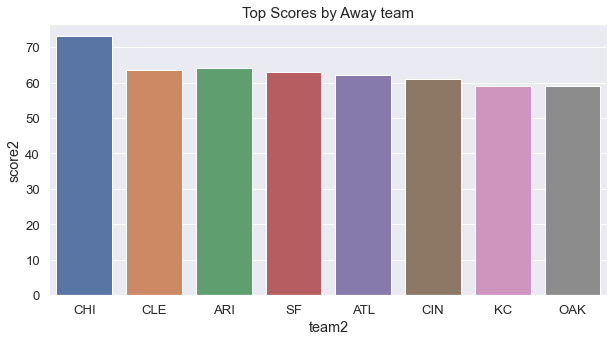

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=top10scor2.team2, y=top10scor2.score2, data=top10scor2, ci=None)
plt.title("Top Scores by Away team", fontsize=15)
plt.show()

In [15]:
df.corr()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
season,1.000000,0.051373,0.066684,0.103253,-0.023417,0.023417,0.061895,0.104371,0.059950,0.058854,0.458450,0.457993,0.019745,0.017746,0.001713,-0.001713,0.180483,0.171113,0.451834,0.449842,0.058481,0.057591,0.190305,0.250625,0.073894,NaN,NaN
neutral,0.051373,1.000000,0.077988,0.076570,-0.032730,0.032730,0.078805,0.072311,0.083755,0.080116,0.065502,0.062931,0.029906,0.011758,-0.026945,0.026945,0.033875,0.019186,0.066404,0.060824,0.084229,0.075836,0.016281,0.014871,0.070962,-0.008357,-0.010091
elo1_pre,0.066684,0.077988,1.000000,0.084080,0.674450,-0.674450,0.979693,0.079009,0.988769,0.072021,0.476794,0.038353,0.141076,0.014111,0.663955,-0.663955,0.194157,-0.043681,0.471387,0.024437,0.966671,0.069024,0.224749,-0.178073,0.691749,0.361266,0.547672
elo2_pre,0.103253,0.076570,0.084080,1.000000,-0.669397,0.669397,0.082192,0.979309,0.073319,0.988414,0.048060,0.453276,0.032559,0.119926,-0.633687,0.633687,-0.016848,0.181121,0.039200,0.447894,0.072550,0.965444,-0.166091,0.221408,0.685096,0.528126,0.642480
elo_prob1,-0.023417,-0.032730,0.674450,-0.669397,1.000000,-1.000000,0.660685,-0.657795,0.673194,-0.663589,0.315077,-0.301726,0.080717,-0.075362,0.960195,-0.960195,0.156273,-0.164416,0.317890,-0.308147,0.657267,-0.648885,0.285497,-0.294993,0.018236,-0.079169,-0.024985
elo_prob2,0.023417,0.032730,-0.674450,0.669397,-1.000000,1.000000,-0.660685,0.657795,-0.673194,0.663589,-0.315077,0.301726,-0.080717,0.075362,-0.960195,0.960195,-0.156273,0.164416,-0.317890,0.308147,-0.657267,0.648885,-0.285497,0.294993,-0.018236,0.079169,0.024985
elo1_post,0.061895,0.078805,0.979693,0.082192,0.660685,-0.660685,1.000000,0.036657,0.968382,0.071748,0.473297,0.028034,0.151108,0.005608,0.653497,-0.653497,0.271311,-0.121998,0.485872,-0.002684,0.989905,0.024986,0.329760,-0.288105,0.678880,0.338369,0.524775
elo2_post,0.104371,0.072311,0.079009,0.979309,-0.657795,0.657795,0.036657,1.000000,0.069327,0.967442,0.039441,0.453903,0.018386,0.125872,-0.626146,0.626146,-0.099578,0.258242,0.012588,0.466050,0.024716,0.989522,-0.274002,0.332134,0.668347,0.535871,0.645799
qbelo1_pre,0.059950,0.083755,0.988769,0.073319,0.673194,-0.673194,0.968382,0.069327,1.000000,0.070671,0.459966,0.036635,0.119921,0.016145,0.668956,-0.668956,0.191345,-0.046886,0.455672,0.022165,0.977434,0.067909,0.219621,-0.188569,0.694692,0.392290,0.576750
qbelo2_pre,0.058854,0.080116,0.072021,0.988414,-0.663589,0.663589,0.071748,0.967442,0.070671,1.000000,0.044988,0.435902,0.033476,0.097107,-0.638831,0.638831,-0.018993,0.177249,0.035958,0.431427,0.069980,0.976758,-0.172154,0.200879,0.686494,0.542693,0.652286


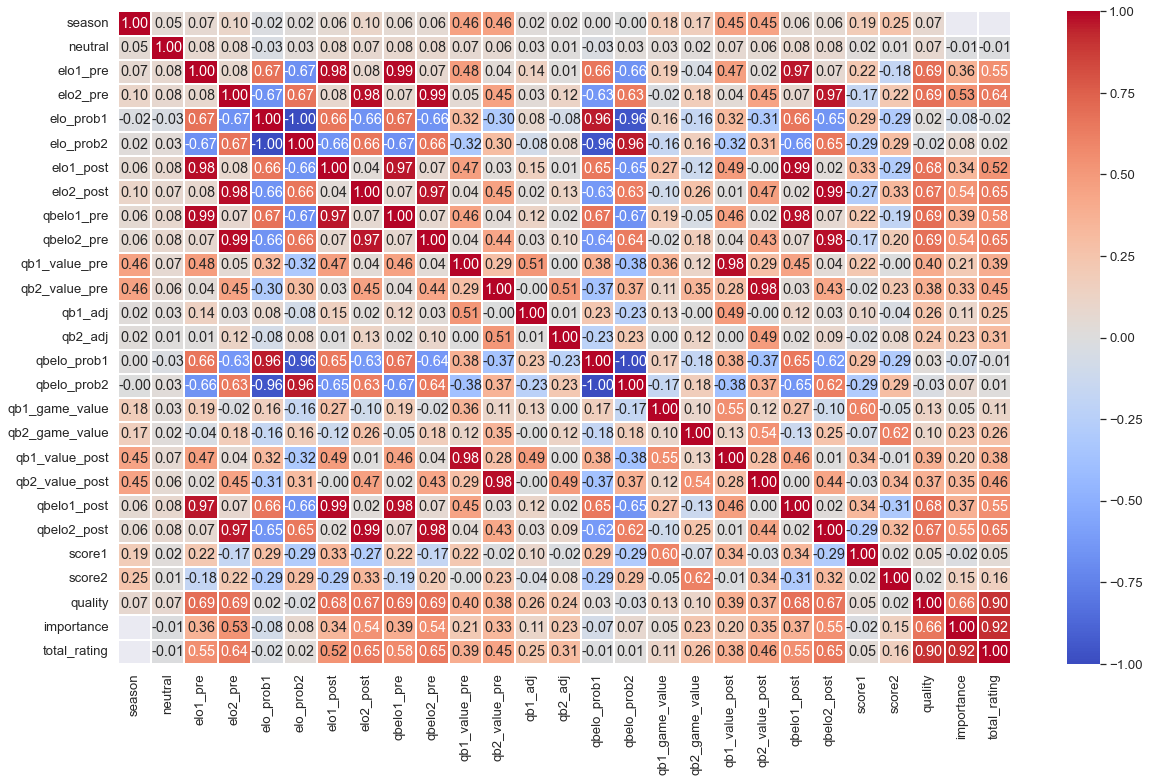

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()